# Parameter estimation of Lotka Volterra model using optimisation methods

In [1]:
using ParameterizedFunctions, OrdinaryDiffEq, DiffEqParamEstim
using BlackBoxOptim, NLopt, Plots, RecursiveArrayTools
gr(fmt=:png)


ArgumentError: Module Hiccup not found in current path.
Run `Pkg.add("Hiccup")` to install the Hiccup package.

Plots.GRBackend()

In [2]:
loc_bounds = Tuple{Float64, Float64}[(0, 5), (0, 5), (0, 5), (0, 5)]
glo_bounds = Tuple{Float64, Float64}[(0, 10), (0, 10), (0, 10), (0, 10)]
loc_init = [1,0.5,3.5,1.5]
glo_init = [5,5,5,5]

4-element Array{Int64,1}:
 5
 5
 5
 5

In [3]:
f = @ode_def_nohes LotkaVolterraTest begin
    dx = a*x - b*x*y
    dy = -c*y + d*x*y
end a b c d

(::LotkaVolterraTest) (generic function with 9 methods)

In [4]:
u0 = [1.0,1.0]                          #initial values
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1,0]                   #parameters used, these need to be estimated from the data
tspan = (0.0, 30.0)                     # sample of 3000 observations over the (0,30) timespan
prob = ODEProblem(f, u0, tspan,p)
tspan2 = (0.0, 3.0)                     # sample of 3000 observations over the (0,30) timespan
prob_short = ODEProblem(f, u0, tspan2,p)

DiffEqBase.ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 3.0)
u0: [1.0, 1.0]

In [5]:
dt = 30.0/3000                    
tf = 30.0
tinterval = 0:dt:tf
t  = collect(tinterval)

3001-element Array{Float64,1}:
  0.0 
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1 
  0.11
  0.12
  ⋮   
 29.89
 29.9 
 29.91
 29.92
 29.93
 29.94
 29.95
 29.96
 29.97
 29.98
 29.99
 30.0 

In [6]:
h = 0.01
M = 300
tstart = 0.0
tstop = tstart + M * h
tinterval_short = 0:h:tstop
t_short = collect(tinterval_short)

301-element Array{Float64,1}:
 0.0 
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 ⋮   
 2.89
 2.9 
 2.91
 2.92
 2.93
 2.94
 2.95
 2.96
 2.97
 2.98
 2.99
 3.0 

In [7]:
#Generate Data 
data_sol_short = solve(prob_short,Tsit5(),saveat=t_short,reltol=1e-9,abstol=1e-9)
data_short = convert(Array, data_sol_short) 
data_sol = solve(prob,Tsit5(),saveat=t,reltol=1e-9,abstol=1e-9)
data = convert(Array, data_sol)

2×3001 Array{Float64,2}:
 1.0  1.00511   1.01045   1.01601   1.02179   …  1.07814   1.08595   1.09398 
 1.0  0.980224  0.960888  0.941986  0.923508     0.785597  0.770673  0.756092

#### Plot of the solution

##### Short Solution 


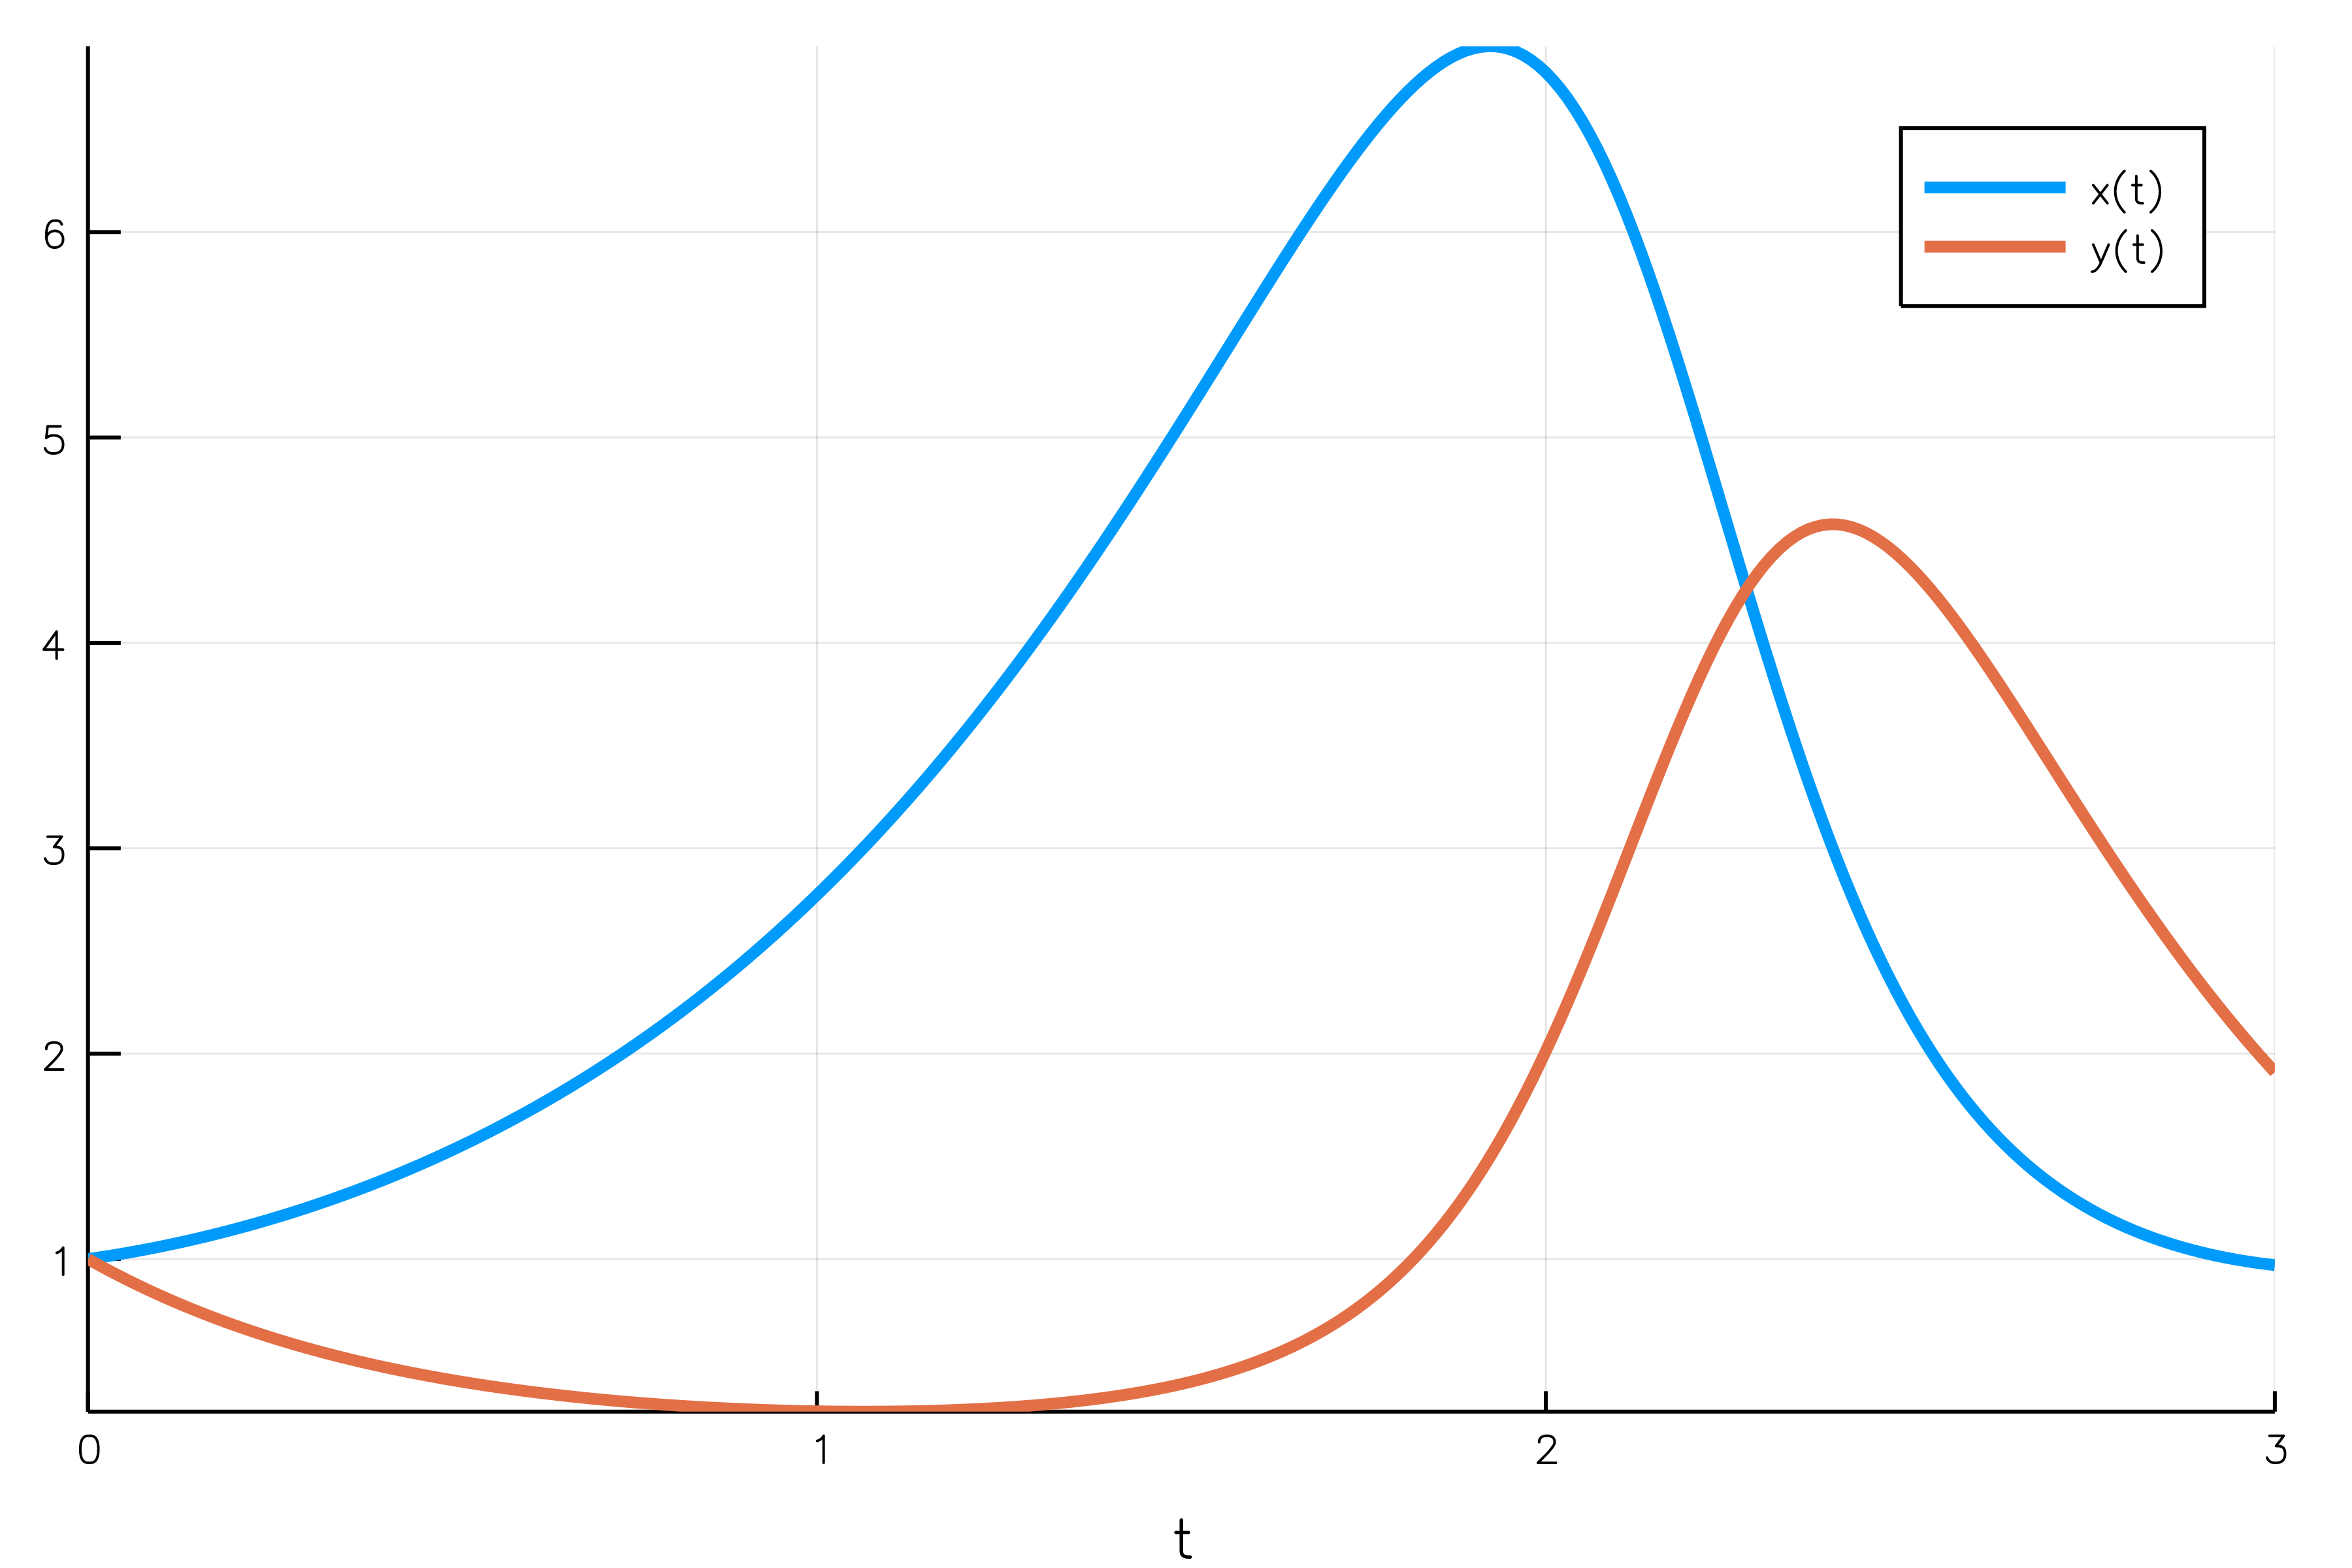

In [22]:
p1 = plot(data_sol_short) 

##### Longer Solution 


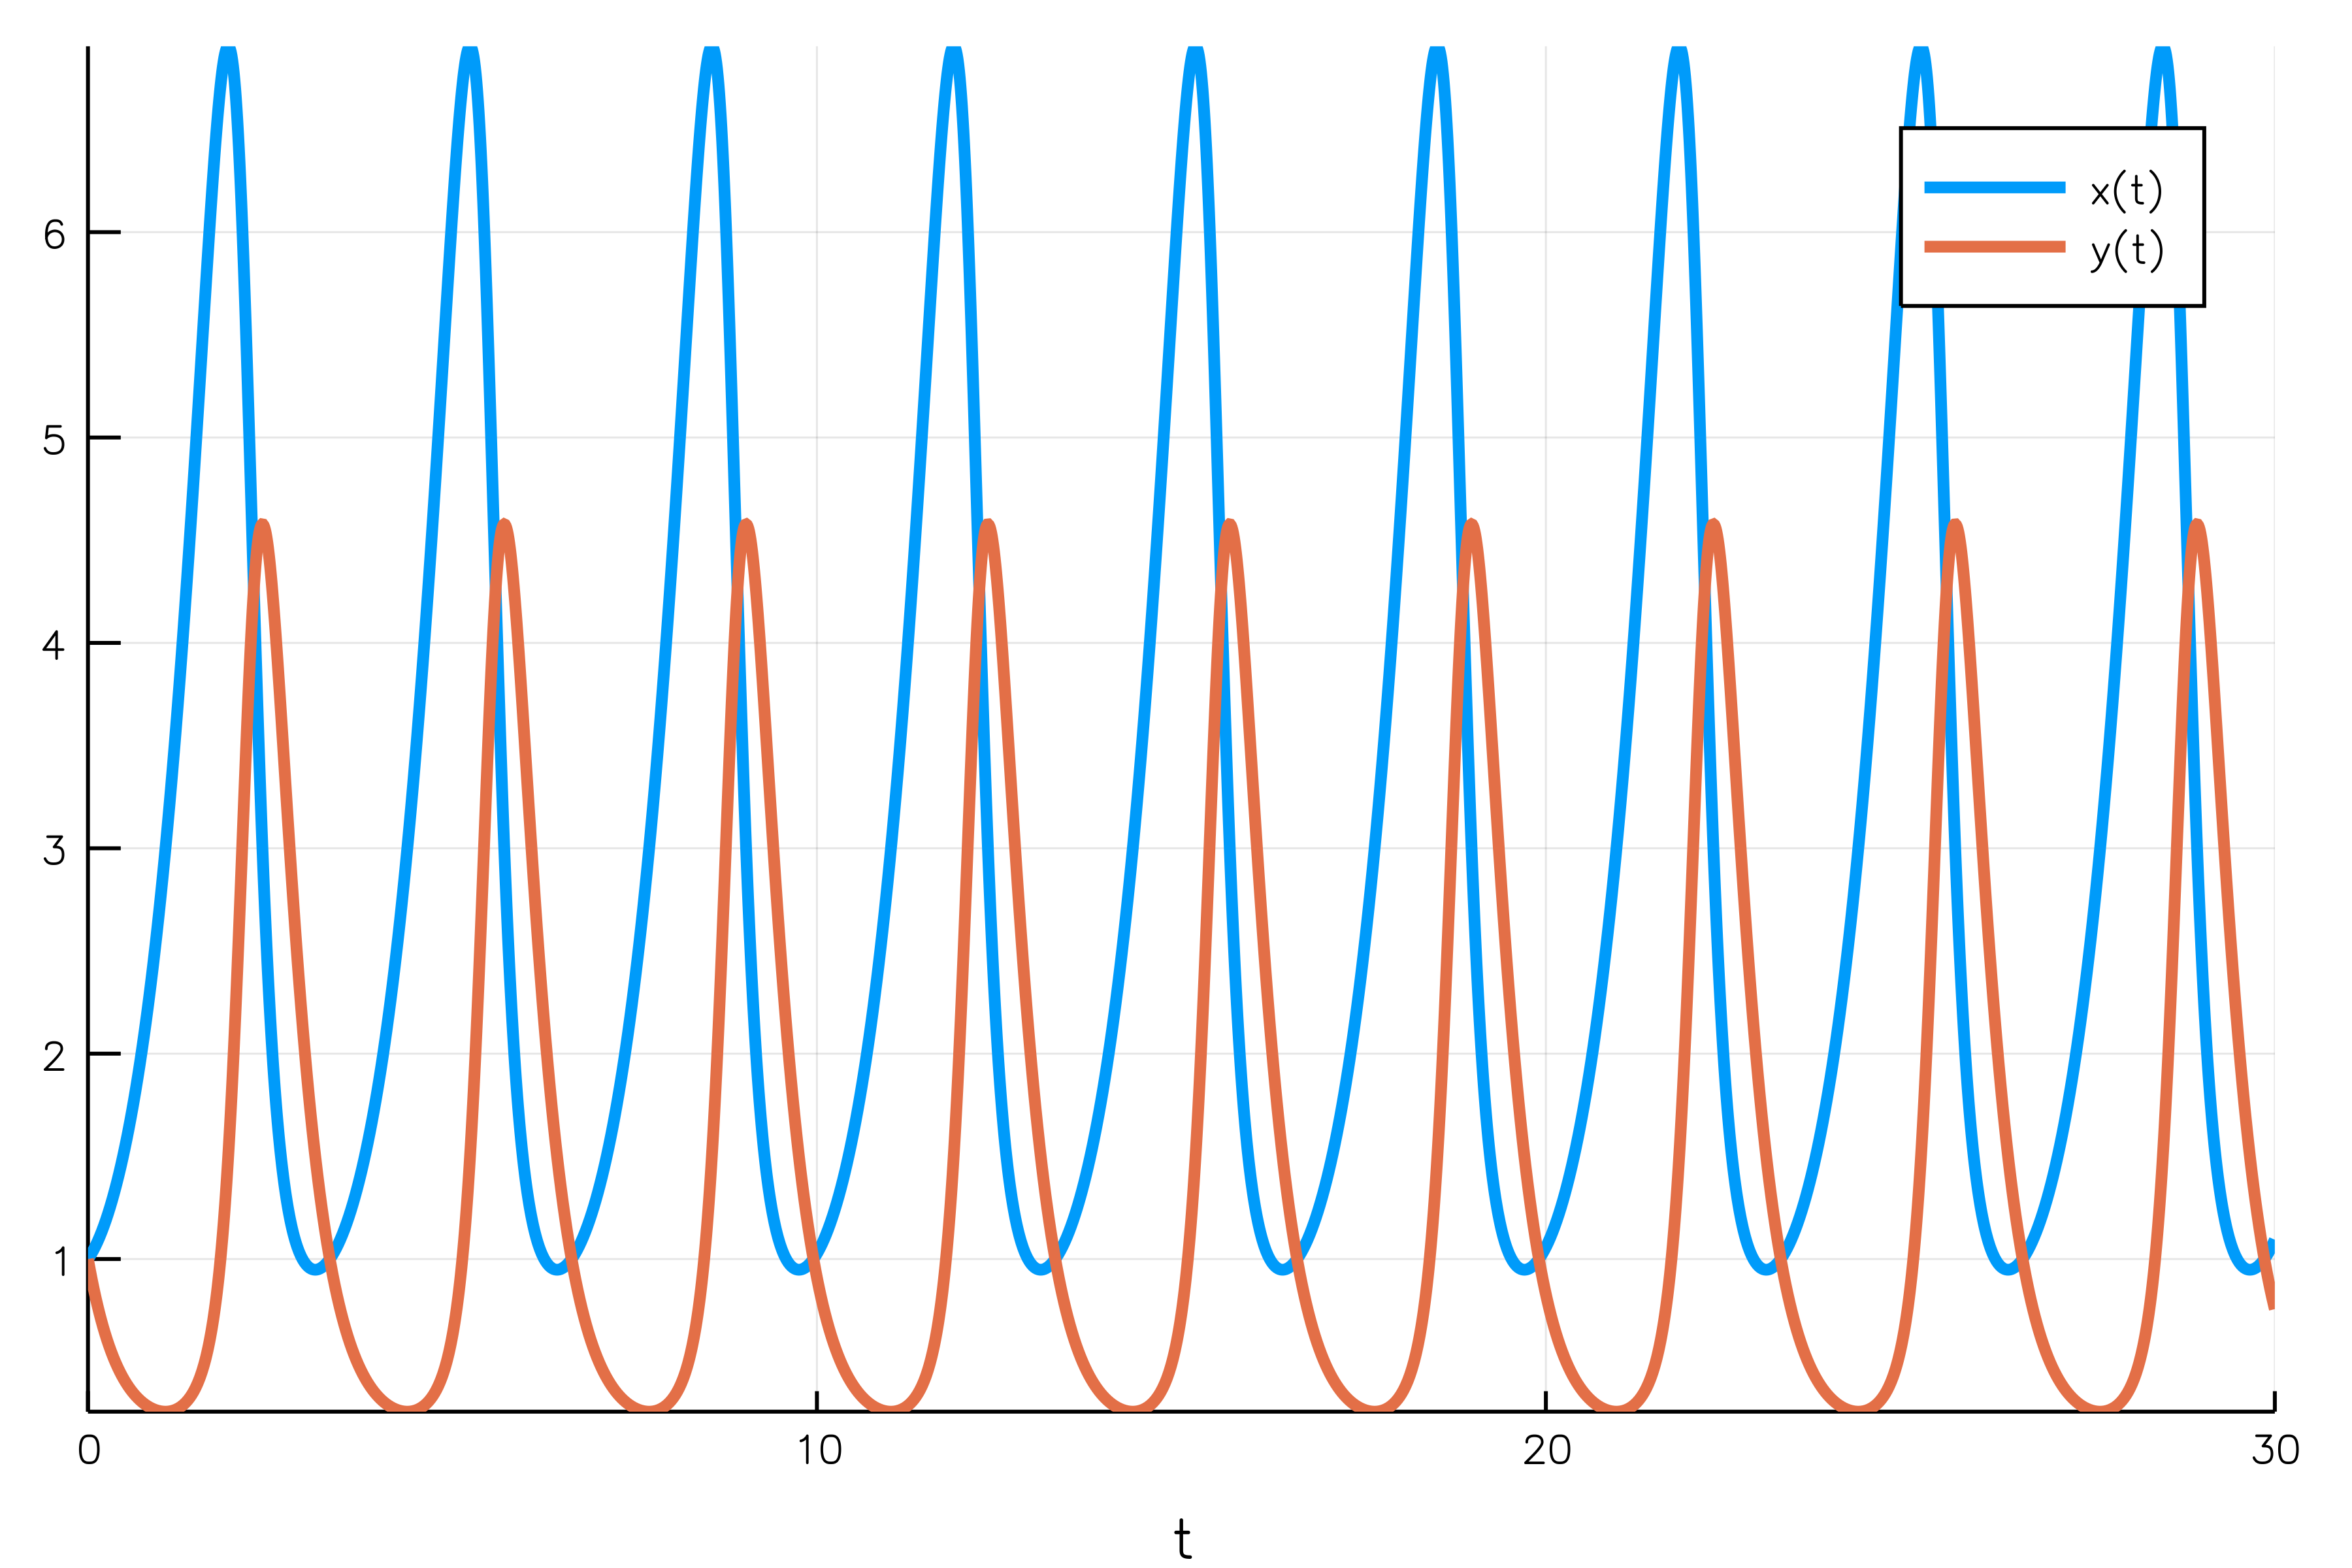

In [23]:
p2 = plot(data_sol)

### Local Solution from the short data set

In [25]:
obj_short = build_loss_objective(prob_short,Tsit5(),L2Loss(t_short,data_short),tstops=t_short)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)
# Lower tolerance could lead to smaller fitness (more accuracy)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 273 evals, 165 steps, improv/step: 0.285 (last = 0.2848), fitness=1016.957050515
1.00 secs, 622 evals, 462 steps, improv/step: 0.266 (last = 0.2559), fitness=1016.957050515
1.50 secs, 1003 evals, 839 steps, improv/step: 0.211 (last = 0.1432), fitness=268.640833480
2.00 secs, 1399 evals, 1235 steps, improv/step: 0.176 (last = 0.1010), fitness=268.640833480
2.50 secs, 1808 evals, 1644 steps, improv/step: 0.162 (last = 0.1198), fitness=268.640833480
3.00 secs, 2211 evals, 2047 steps, improv/step: 0.155 (last = 0.1266), fitness=121.257093434
3.51 secs, 2649 evals, 2485 steps, improv/step: 0.146 (last = 0.1050), fitness=69.269678968
4.01 secs, 3070 evals, 2906 steps, improv/step: 0.142 (last = 0.1164), fitness=69.269

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.519035499385414e9, 8.905229091644287, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 966848),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)]),Pair{Symbol,Any}(:MaxSteps, 7000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 7161, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiv

In [27]:
obj_short = build_loss_objective(prob_short,Tsit5(),L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)
# Change in tolerance makes it worse 

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 455 evals, 363 steps, improv/step: 0.405 (last = 0.4050), fitness=929.643587117
1.00 secs, 922 evals, 821 steps, improv/step: 0.275 (last = 0.1725), fitness=929.643587117
1.50 secs, 1396 evals, 1295 steps, improv/step: 0.215 (last = 0.1118), fitness=894.983444374
2.00 secs, 1872 evals, 1771 steps, improv/step: 0.195 (last = 0.1387), fitness=550.322143493
2.50 secs, 2352 evals, 2251 steps, improv/step: 0.181 (last = 0.1313), fitness=218.460884385
3.00 secs, 2828 evals, 2727 steps, improv/step: 0.168 (last = 0.1050), fitness=107.728782888
3.50 secs, 3308 evals, 3207 steps, improv/step: 0.163 (last = 0.1333), fitness=81.592440871
4.00 secs, 3783 evals, 3683 steps, improv/step: 0.166 (last = 0.1891), fitness=12.7947

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.519035581540838e9, 7.579108953475952, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 140086),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)]),Pair{Symbol,Any}(:MaxSteps, 7000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 7100, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiv

In [28]:
obj_short = build_loss_objective(prob_short,Vern9(),L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj_short;SearchRange = glo_bounds, MaxSteps = 7e3)
# using the moe accurate Vern9() reduces the fitness marginally and leads to some increase in time taken 

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 390 evals, 302 steps, improv/step: 0.404 (last = 0.4040), fitness=843.219465078
1.00 secs, 767 evals, 671 steps, improv/step: 0.285 (last = 0.1870), fitness=843.219465078
1.50 secs, 1146 evals, 1050 steps, improv/step: 0.238 (last = 0.1557), fitness=645.732997036
2.00 secs, 1509 evals, 1413 steps, improv/step: 0.219 (last = 0.1653), fitness=497.933355501
2.50 secs, 1846 evals, 1750 steps, improv/step: 0.214 (last = 0.1899), fitness=205.853075307
3.00 secs, 2230 evals, 2135 steps, improv/step: 0.206 (last = 0.1688), fitness=184.343498743
3.50 secs, 2612 evals, 2517 steps, improv/step: 0.201 (last = 0.1754), fitness=113.182104425
4.00 secs, 2994 evals, 2900 steps, improv/step: 0.196 (last = 0.1593), fitness=78.651

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (7000) reached", 7001, 1.519063319304561e9, 9.272572994232178, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 150832),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)]),Pair{Symbol,Any}(:MaxSteps, 7000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 7093, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiv

# Using NLOpt

#### Global Optimisation first

In [29]:
obj_short = build_loss_objective(prob_short,Vern9(),L2Loss(t_short,data_short),tstops=t_short,reltol=1e-9,abstol=1e-9)

(::DiffEqObjective) (generic function with 2 methods)

In [39]:
opt = Opt(:GN_ORIG_DIRECT_L, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

  4.513634 seconds (20.26 M allocations: 932.544 MiB, 6.24% gc time)


(368.38768828452805, [1.7284, 2.22222, 3.58025, 1.11721], :XTOL_REACHED)

In [40]:
opt = Opt(:GN_CRS2_LM, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init) # Accurate 3.0 seconds

 10.336416 seconds (44.66 M allocations: 2.008 GiB, 6.09% gc time)


(1.666568476909536e-16, [1.5, 1.0, 3.0, 1.0], :XTOL_REACHED)

In [41]:
opt = Opt(:GN_ISRES, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init) # Accurate to single precision 8.2 seconds

 12.017355 seconds (51.87 M allocations: 2.332 GiB, 6.15% gc time)


(78.79527577084399, [1.66903, 1.35483, 2.82309, 0.931555], :MAXEVAL_REACHED)

In [42]:
opt = Opt(:GN_ESCH, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 11.706548 seconds (51.87 M allocations: 2.332 GiB, 6.24% gc time)


(127.5544935886119, [1.20976, 0.997765, 5.51566, 1.84416], :MAXEVAL_REACHED)

Now local optimization algorithms are used to check the global ones, these use the local constraints, different intial values and time step

In [44]:
opt = Opt(:LN_BOBYQA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.403214 seconds (1.65 M allocations: 76.180 MiB, 6.53% gc time)


(1.6661750310234297e-16, [1.5, 1.0, 3.0, 1.0], :SUCCESS)

In [38]:
opt = Opt(:LN_NELDERMEAD, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.548581 seconds (2.60 M allocations: 119.643 MiB, 5.73% gc time)


(1.6661765163255584e-16, [1.5, 1.0, 3.0, 1.0], :XTOL_REACHED)

In [45]:
opt = Opt(:LD_SLSQP, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.380009 seconds (1.38 M allocations: 63.758 MiB, 6.01% gc time)


(4.1924574575045983e-16, [1.5, 1.0, 3.0, 1.0], :XTOL_REACHED)

In [46]:
opt = Opt(:LN_COBYLA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

 12.983424 seconds (51.87 M allocations: 2.332 GiB, 5.96% gc time)


(4.3894137711062486e-10, [1.5, 1.0, 3.0, 1.0], :MAXEVAL_REACHED)

In [47]:
opt = Opt(:LN_NEWUOA_BOUND, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.536328 seconds (1.53 M allocations: 70.449 MiB, 3.70% gc time)


(1.6745168415268672e-9, [1.5, 1.0, 3.0, 0.999998], :SUCCESS)

In [48]:
opt = Opt(:LN_PRAXIS, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.254823 seconds (1.10 M allocations: 50.867 MiB, 5.12% gc time)


(1.6664280036884964e-16, [1.5, 1.0, 3.0, 1.0], :SUCCESS)

In [49]:
opt = Opt(:LN_SBPLX, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

 12.786594 seconds (51.87 M allocations: 2.332 GiB, 6.06% gc time)


(3.857624965591935e-12, [1.5, 1.0, 3.0, 1.0], :MAXEVAL_REACHED)

In [50]:
opt = Opt(:LD_MMA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

 23.433297 seconds (100.96 M allocations: 4.539 GiB, 6.16% gc time)


(4.632433645015572e-15, [1.5, 1.0, 3.0, 1.0], :XTOL_REACHED)

In [55]:
opt = Opt(:LD_TNEWTON_PRECOND_RESTART, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj_short.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  0.425463 seconds (1.82 M allocations: 83.802 MiB, 6.49% gc time)


(4.192581262191412e-16, [1.5, 1.0, 3.0, 1.0], :SUCCESS)

## Now the longer problem is solved for a global solution

Vern9 solver with reltol=1e-9 and abstol=1e-9 is used and the dataset is increased to 3000 observations per variable with the same integration time step of 0.01. 

In [11]:
obj = build_loss_objective(prob,Vern9(),L2Loss(t,data),tstops=t,reltol=1e-9,abstol=1e-9)
res1 = bboptimize(obj;SearchRange = glo_bounds, MaxSteps = 4e3)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64},BlackBoxOptim.RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},BlackBoxOptim.RandomBound{BlackBoxOptim.RangePerDimSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 38 evals, 20 steps, improv/step: 0.450 (last = 0.4500), fitness=25111.894273312
1.02 secs, 89 evals, 48 steps, improv/step: 0.313 (last = 0.2143), fitness=25053.462444492
1.52 secs, 145 evals, 85 steps, improv/step: 0.376 (last = 0.4595), fitness=24174.483445631
2.03 secs, 202 evals, 121 steps, improv/step: 0.405 (last = 0.4722), fitness=24174.483445631
2.55 secs, 259 evals, 169 steps, improv/step: 0.361 (last = 0.2500), fitness=24174.483445631
3.05 secs, 315 evals, 216 steps, improv/step: 0.352 (last = 0.3191), fitness=24174.483445631
3.56 secs, 371 evals, 265 steps, improv/step: 0.340 (last = 0.2857), fitness=24174.483445631
4.06 secs, 427 evals, 317 steps, improv/step: 0.319 (last = 0.2115), fitness=24174.483

BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (4000) reached", 4001, 1.519072119852892e9, 38.45695400238037, BlackBoxOptim.DictChain{Symbol,Any}[BlackBoxOptim.DictChain{Symbol,Any}[Dict{Symbol,Any}(Pair{Symbol,Any}(:RngSeed, 453480),Pair{Symbol,Any}(:SearchRange, Tuple{Float64,Float64}[(0.0, 10.0), (0.0, 10.0), (0.0, 10.0), (0.0, 10.0)]),Pair{Symbol,Any}(:MaxSteps, 4000)),Dict{Symbol,Any}()],Dict{Symbol,Any}(Pair{Symbol,Any}(:FitnessScheme, BlackBoxOptim.ScalarFitnessScheme{true}()),Pair{Symbol,Any}(:NumDimensions, :NotSpecified),Pair{Symbol,Any}(:PopulationSize, 50),Pair{Symbol,Any}(:MaxTime, 0.0),Pair{Symbol,Any}(:SearchRange, (-1.0, 1.0)),Pair{Symbol,Any}(:Method, :adaptive_de_rand_1_bin_radiuslimited),Pair{Symbol,Any}(:MaxNumStepsWithoutFuncEvals, 100),Pair{Symbol,Any}(:RngSeed, 1234),Pair{Symbol,Any}(:MaxFuncEvals, 0),Pair{Symbol,Any}(:SaveTrace, false)…)], 4119, BlackBoxOptim.ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiv

In [58]:
opt = Opt(:GN_ORIG_DIRECT_L, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

 18.755057 seconds (111.29 M allocations: 3.996 GiB, 6.36% gc time)


(23525.885834893048, [8.2716, 7.42112, 7.40283, 3.7037], :XTOL_REACHED)

In [59]:
opt = Opt(:GN_CRS2_LM, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 20000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

111.150594 seconds (610.53 M allocations: 21.919 GiB, 6.42% gc time)


(1.2705840498535213e-14, [1.5, 1.0, 3.0, 1.0], :XTOL_REACHED)

In [12]:
opt = Opt(:GN_ISRES, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 50000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

480.627423 seconds (2.66 G allocations: 95.468 GiB, 5.39% gc time)


(15706.039886042694, [0.890527, 2.82055, 7.30291, 3.16016], :MAXEVAL_REACHED)

In [17]:
opt = Opt(:GN_ESCH, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[10.0,10.0,10.0,10.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 20000)
@time (minf,minx,ret) = NLopt.optimize(opt,glo_init)

190.593401 seconds (1.06 G allocations: 38.187 GiB, 5.61% gc time)


(5349.519364526044, [5.57086, 5.45452, 0.691004, 0.229893], :MAXEVAL_REACHED)

In [14]:
opt = Opt(:LN_BOBYQA, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  5.178218 seconds (28.39 M allocations: 1.020 GiB, 5.41% gc time)


(1.2705773526988974e-14, [1.5, 1.0, 3.0, 1.0], :SUCCESS)

In [18]:
opt = Opt(:LN_NELDERMEAD, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-9)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  4.445542 seconds (25.31 M allocations: 930.665 MiB, 5.69% gc time)


(1.7646805842304758e-14, [1.5, 1.0, 3.0, 1.0], :XTOL_REACHED)

In [19]:
opt = Opt(:LD_SLSQP, 4)
lower_bounds!(opt,[0.0,0.0,0.0,0.0])
upper_bounds!(opt,[5.0,5.0,5.0,5.0])
min_objective!(opt, obj.cost_function2)
xtol_rel!(opt,1e-12)
maxeval!(opt, 10000)
@time (minf,minx,ret) = NLopt.optimize(opt,loc_init)

  8.212982 seconds (37.01 M allocations: 1.329 GiB, 4.69% gc time)


(21569.71360893396, [3.25971, 2.72384, 0.85817, 0.404497], :XTOL_REACHED)

#### Parameter estimation on the longer sample proves to be extremely challenging for some of the global optimizers. A few give the accurate values, BlacBoxOptim also performs quite well while others seem to struggle with accuracy a lot.

# Conclusion 

In general we observe that lower tolerance lead to higher accuracy but too low tolerance could affect the convergance time drastically. Also fitting a shorter timespan seems to be easier in comparision (quite intutively). NLOpt methods seem to give great accuracy in the shorter problem with a lot of the algorithms giving 0 fitness, BBO performs very well on it with marginal change with `tol` values. In case of global optimization of the longer problem  there is some difference in the perfomance amongst the algorithms with `LD_SLSQP` `GN_ESCH` `GN_ISRES` `GN_ORIG_DIRECT_L` performing among the worse, BBO also gives a bit high fitness in comparision.    